In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

Seeeeeeeeeeeeeding!!!
Dataset type: train

Data dirs ['../../../datasets/s7/train/seq0', '../../../datasets/s7/train/seq20', '../../../datasets/s7/train/seq39']
Ext tif
Multi ramp
Ramps in dataset 1
Using stats: ../../../datasets/s7/stats_total.json
Data Stats {'focus_min': 0.1, 'focus_max': 0.5, 'frames': {'depth': {'min': 0, 'max': 1.5}}}
MIN DEPTH HARDCODED!!!
depth_normalize: Normalize(0.03, 1.5, clamp_max=False)
coc_normalize: None
signed_coc_normalize: None
Lens: {'focal_length': 0.004200000000000001, 'depth_scale': 1, 'f_number': 1.7, 'aperture_radius': 0.002470588235294118}
Dataset type: train

Data dirs ['../../../datasets/s7_5ramp/train/seq0', '../../../datasets/s7_5ramp/train/seq26']
Ext tif
Multi ramp
Ramps in dataset 5
Using stats: ../../../datasets/s7_5ramp/stats_total.json
Data Stats {'focus_min': 0.1, 'focus_max': 0.5, 'frames': {'depth': {'min': 0, 'max': 1.5}}}
MIN DEPTH HARDCODED!!!
depth_normalize: Normalize(0.03, 1.5, clamp_max=False)
coc_normalize: None
signed_coc

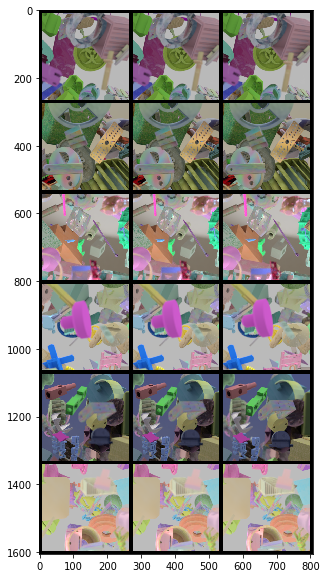

In [32]:
from data.dataset import DatasetJoin
from data.video_depth_focus_data import VideoDepthFocusData
from tools.tools import deterministic
from tools.vis_tools import plot_tensor_grid
import torch

deterministic()

dataset_names = ["s7", "s7_5ramp"]
datasets = []

for name in dataset_names:
    data = VideoDepthFocusData(proj_dir("datasets"), "train", name)
    data.configure(sample_count=3, depth_output_indices=[-1])
    datasets.append(data)
    
data = DatasetJoin(datasets)

plot_tensor_grid(torch.cat([data[i]["color"] for i in range(len(data))]), nrow=3, figsize=[10, 10])

In [ ]:
from tools.tools import arg_cross_prod, dict_cross_prod

#dict_cross_prod({"vala": [5, "s"], "gbf": [3, 2, 7, "csad"]})

arg_cross_prod(vala=[5, "s"], gbf=[3, 2, 7, "csad"])

In [ ]:
from data.dataset import EmptyDataset, DatasetJoin

datasets = [EmptyDataset(6), EmptyDataset(3), EmptyDataset(5)]

join = DatasetJoin(datasets)

join[9]

In [ ]:
import torch
from matplotlib import cm
import matplotlib.pyplot as plt

def _apply_colormap(tensor, colormap):
    if colormap is not None:
        return torch.Tensor(cm.get_cmap(colormap)(tensor[0])).permute(2, 0, 1)[:3]
    else:
        return torch.cat([tensor] * 3)
    
cmap_strip = torch.linspace(1, 0, 100).repeat(1,5,1).permute(0, 2, 1)
cmap_strip = _apply_colormap(cmap_strip, "viridis")

plt.imshow(cmap.permute(1, 2, 0))

In [ ]:
from net.unet import UNet
from tools import module_flat_str
from net.ddff_net import DDFFNet
import torch


#net = UNet([64, 128, 256, 512, 1024])
net = DDFFNet()

print(module_flat_str(net, [torch.nn.Dropout, torch.nn.ReLU]))

In [ ]:
import torch
from tools import module_flat_str

#print(module_flat_str(net))

x = torch.rand(1, 3, 224, 224)

out = net(x)

In [ ]:
print(out.shape)

In [ ]:
from torch import nn
print(module_flat_str(net))
#print(module_flat_str(net.encoder.features))
#print(module_flat_str(net.encoder.features, [nn.ReLU, nn.BatchNorm2d]))

In [ ]:
from net.vgg import VGGAE

net = VGGAE(bn_eps=1e-5)

x = torch.rand(2, 3, 224, 224)

out = net(x)

print(module_flat_str(net, [torch.nn.Dropout, torch.nn.ReLU]))
#print(module_flat_str(VGG16Encoder(), [nn.ReLU, nn.BatchNorm2d]))

In [ ]:
print(out.size())

In [ ]:
class A:
    def test_method(a):
        pass
    
    def __getitem__(self, key):
        # self.test_method(key)
        
        if isinstance(key, slice):
            for idx in range(*key.indices(5)):
                print(idx)
    
a = A()
a[3:5]

torch.Size([3, 512, 768])


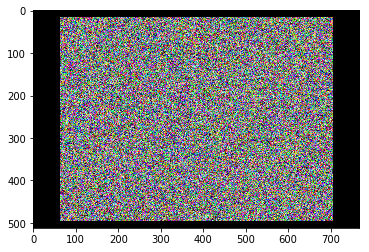

In [23]:
import torch
from data.data_transforms import PadToMultiple
from tools.vis_tools import plot_tensor_grid

pad = PadToMultiple(256)

x = torch.rand(3, 480, 640)

x_pad = pad(x)
print(x_pad.shape)

plot_tensor_grid([x_pad])

In [7]:
import torch

a = torch.tensor([[5, 2, 9], [5, 1, 9], [5, 2, 9]])

print(a)

a.repeat(1, 3)

tensor([[5, 2, 9],
        [5, 1, 9],
        [5, 2, 9]])


tensor([[5, 2, 9, 5, 2, 9, 5, 2, 9],
        [5, 1, 9, 5, 1, 9, 5, 1, 9],
        [5, 2, 9, 5, 2, 9, 5, 2, 9]])

In [2]:
import torch

x = torch.rand([3, 5, 2, 3, 6])

x[:, :, []]

tensor([], size=(3, 5, 0, 3, 6))

In [4]:
from net.pool_net import PoolNet
from tools.tools import module_flat_str
from torch import nn

net = PoolNet(
    in_channels=3,
    enc_sizes=[32, 48, 64, 128, 192],
    dec_sizes=[192, 128, 96, 48, 48],
    final_conv_sizes=[32, 32, 32],
    dec_pool_layers=[False]*4+[True]
)

print(module_flat_str(net, module_filter=[nn.ReLU, nn.BatchNorm2d]))

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
MaxReduce()
Conv2d(64, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
Conv2d(48, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
MaxReduce()
Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
MaxReduce()
Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
MaxReduce()
Conv2d(256, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
Conv2d(192, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
ConvTranspose2d(192, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
Conv2d(320, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=F

In [2]:
from net.recurrent_ae import RecurrentAE
from tools.tools import module_flat_str
from torch import nn

net = RecurrentAE(enc_sizes=[32, 48, 64, 128, 192])

print(module_flat_str(net, module_filter=[nn.ReLU, nn.BatchNorm2d]))

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(96, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=F

In [2]:
import torch
from tools.tools import load_tensor_image, dump_tensor

files = [
    "/home/kevin/Documents/master-thesis/datasets/dining_room_old/train/clip0/allinfocus/allinfocus0000.tif",
    #"/home/kevin/Documents/master-thesis/datasets/dining_room_old/train/clip9/allinfocus/allinfocus0000.tif",
    "/home/kevin/Documents/master-thesis/datasets/dining_room_old/train/clip10/allinfocus/allinfocus0000.tif"
]

imgs = torch.stack([load_tensor_image(f) for f in files], dim=0)

img_max = torch.max(imgs, dim=0)[0]

for i in range(imgs.shape[0]):
    dump_tensor(imgs[i])
    
dump_tensor(img_max)